In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities from citipy
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
city_count

639

In [3]:
#Gather weather data from openweathermap api and fill the appropriate lists
weatherCities = []
lat = []
lon = []
temp = []
hum = []
cloud = []
wspeed = []
country = []
edate = []

#Set up the url information
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities[0:50]:
    try:
        response = requests.get(query_url + city).json()
        weatherCities.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"]) #the starter code refers to "Max Temp", not "Temp"
        hum.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wspeed.append(response["wind"]["speed"])
        edate.append(response["dt"])
        
        index = cities.index(city)
        print(f"Processing record {index + 1} of {city_count} | {city}") 
        
    except (KeyError, IndexError): 
        print(f"City {city} not found. Skipping City.")
        pass

Processing record 1 of 639 | sinaloa
Processing record 2 of 639 | busselton
Processing record 3 of 639 | chapais
Processing record 4 of 639 | chimore
Processing record 5 of 639 | puerto ayora
Processing record 6 of 639 | sao filipe
Processing record 7 of 639 | faanui
Processing record 8 of 639 | tautira
Processing record 9 of 639 | pitea
Processing record 10 of 639 | guerrero negro
Processing record 11 of 639 | codrington
Processing record 12 of 639 | limache
Processing record 13 of 639 | yahualica
Processing record 14 of 639 | south sioux city
Processing record 15 of 639 | carndonagh
Processing record 16 of 639 | goderich
Processing record 17 of 639 | sayville
Processing record 18 of 639 | iskateley
Processing record 19 of 639 | nemuro
Processing record 20 of 639 | dikson
City saleaula not found. Skipping City.
Processing record 22 of 639 | nouadhibou
Processing record 23 of 639 | tanout
Processing record 24 of 639 | beyneu
Processing record 25 of 639 | punta arenas
Processing record 

In [4]:
#Create the dictionary of weather information for each city, and then convert to data frame and display    
weather_dict = {
    "City": weatherCities,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp (F)": temp,
    "Humidity (%)": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wspeed,
    "Date": edate
}
#Save the city weather data as a data frame
weather_data = pd.DataFrame(weather_dict)

In [12]:
#Clean the data frame by removing any entries with humidity levels over 100%
weather_data_cl = weather_data[weather_data["Humidity (%)"] <= 100]
weather_data_cl.index.name = "City ID"

#Save the city weather data as a csv
weather_data_cl.to_csv("output_data/cities.csv", sep=',', encoding='utf-8')

#Store the first date to label all the plots
start_time = weather_data_cl["Date"].iloc[0]
date = time.strftime('%m-%d-%Y', time.localtime(start_time))

#Convert epoch time into CST
weather_data_cl["Date"] = pd.to_datetime(weather_data_cl["Date"], unit='s', utc=True).dt.tz_convert('US/Central')

#Display the cleaned and formatted data frame
weather_data_cl.head()

,City,Country,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
City ID,,,,,,,,,
0,Sinaloa,MX,25.0000,-107.5000,70.25,51,0,1.01,2022-02-04 19:23:06-06:00
1,Busselton,AU,-33.6500,115.3333,83.26,32,2,4.45,2022-02-04 19:23:06-06:00
2,Chapais,CA,49.7834,-74.8492,-11.42,94,100,3.83,2022-02-04 19:23:06-06:00
3,Chimoré,BO,-16.9833,-65.1333,72.99,98,99,2.13,2022-02-04 19:23:07-06:00
4,Puerto Ayora,EC,-0.7393,-90.3518,75.54,92,70,1.99,2022-02-04 19:23:07-06:00


In [44]:
#Define a function that will create a scatter plot and save it
def scattered(xlabel, ylabel, lat_range, date, savename):
    plt.figure()
    plt.scatter(weather_data_cl[xlabel], weather_data_cl[ylabel], marker = "o", facecolors="skyblue", edgecolors="black")
    plt.grid()
    plt.xlabel(xlabel)
    plt.xlim(lat_range[0], lat_range[1])
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs {xlabel} ({date})")
    
    #Save the figure
    plt.savefig("output_data/"+ savename)
    
    #Display the figure
    plt.show()    

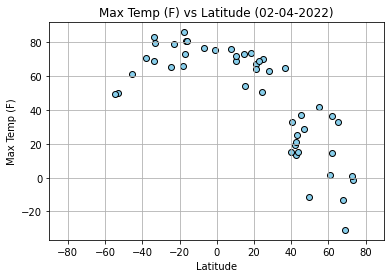

In [45]:
# Temperature (F) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "MaxTvsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

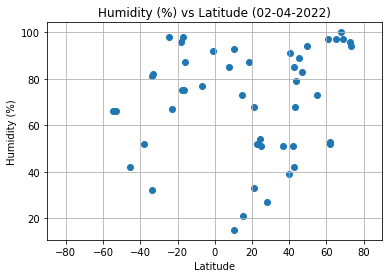

In [15]:
# Humidity (%) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "HumVsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

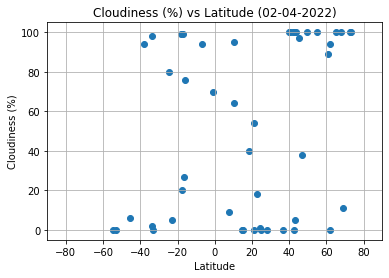

In [16]:
# Cloudiness (%) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
savename = "CloudVsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

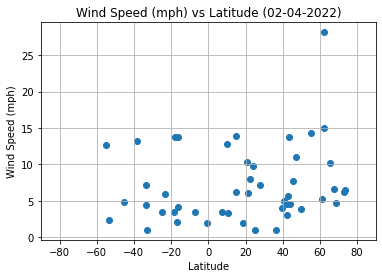

In [17]:
# Wind Speed (mph) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
savename = "WSpdVsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

In [18]:
#Create separate data frames for the northern and southern hemispheres
north_weather_data = weather_data_cl[weather_data_cl["Latitude"] >= 0]
south_weather_data = weather_data_cl[weather_data_cl["Latitude"] < 0]

#Create a data frame for the xlim values for the scatter plots below
xaxis = pd.DataFrame({"Northern": (0, 80), "Southern": (-60, 0)})

In [19]:
#Define a function that will output the r-value, scatter plot, linear regression line, and linear regression equation

def linreg(hemisphere, xlabel, ylabel, annoloc, savename, date):

    if hemisphere == "Northern":
        xvalues = north_weather_data[xlabel]
        yvalues = north_weather_data[ylabel]
    else:     
        xvalues = south_weather_data[xlabel]
        yvalues = south_weather_data[ylabel]
        
    #Format the scatter plot
    plt.figure()
    plt.title(f"{hemisphere} Hemisphere: {ylabel} vs {xlabel} ({date})")
    xlim = xaxis[hemisphere] #pull the xlim values from a data frame
    plt.xlim(xlim)
    plt.scatter(xvalues, yvalues, marker = "o")
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #Calculate everything needed for the linear regression line
    (slope, intercept, rvalue, pvalue, stdder) = linregress(xvalues, yvalues)
    line = slope * xvalues + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Format the linear regression line plot
    plt.plot(xvalues, line, color = "red")
    plt.annotate(line_eq, annoloc, fontsize = 15, color = "red")

    #Save the figure
    plt.savefig("output_data/"+ savename)
        
    #Show r-value and the plot
    print(f"The r-value is {round(rvalue, 4)}")
    plt.show();

The r-value is -0.8495


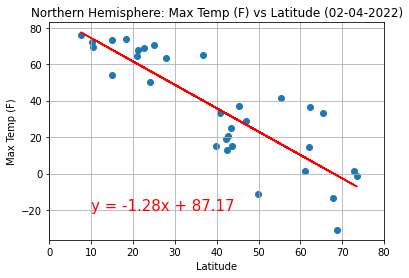

analysis


In [20]:
# Northern Hemisphere - Temperature (F) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "N_MaxTvsLat"
annoloc = (10,-20)   #annotation location for the linear regression equation

#Call on the user-defined linreg function
linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

print("analysis")

The r-value is 0.6979


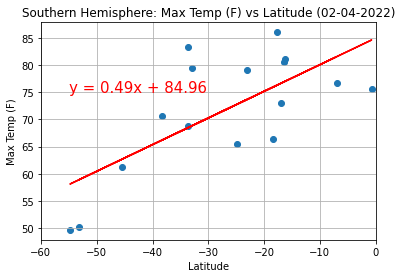

In [21]:
#Southern Hemisphere - Temperature (F) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "S_MaxTvsLat"
annoloc = (-55,75)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.4835


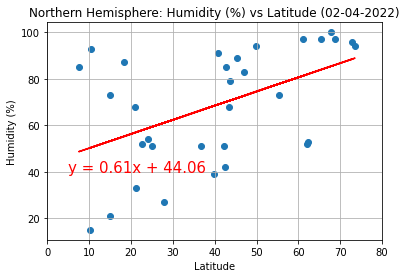

In [22]:
#Northern Hemisphere - Humidity (%) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "N_HumVsLat"
annoloc = (5,40)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.5711


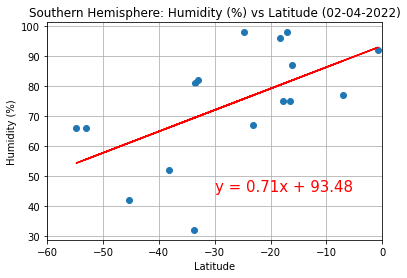

In [23]:
#Southern Hemisphere - Humidity (%) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "S_HumVsLat"
annoloc = (-30,45)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.4662


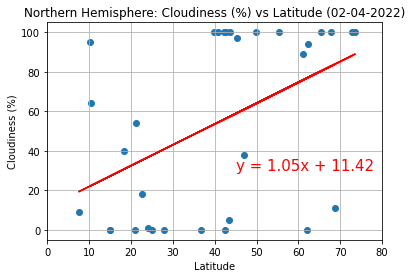

In [24]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
savename = "N_CloudVsLat"
annoloc = (45,30)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.5223


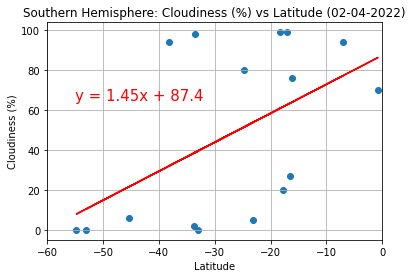

In [25]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
savename = "S_CloudVsLat"
annoloc = (-55,65)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.2033


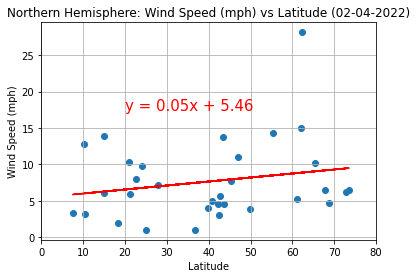

In [26]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
savename = "N_WSpdVsLat"
annoloc = (20,17.5)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is -0.1904


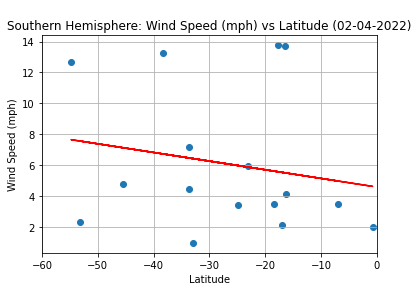

In [27]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
savename = "S_WSpdVsLat"
annoloc = (-30, 15.5)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)